# Descriptive analysis

- Combining whole dataset
- Delete any null
- Make labeling for companies + sentiments
- Define BR, RR and make their analysis

# 1)- Importing key modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.figure(figsize=(16,10)) # this creates a figure 16 inch wide, 10 inch high
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2)- Load data

In [3]:
import pickle
#Loading from firm cleaned file
df = pd.read_pickle('descript.pkl')
#df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,TEXT,UTC DATE,Sent_type
1,"Another reason I failed in love is I'm poor,I ...",2018-07-31 23:13:47,Benefit
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00,Neutral
3,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45,Benefit
4,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25,Neutral
5,Italy took Cristiano and ever since then they’...,2018-07-31 22:53:15,Neutral


In [5]:
df.shape

(455727, 3)

**rename column**

In [6]:
df=df.rename(columns={"Sent_type": "sentiment"})

In [7]:
df.sentiment.value_counts()

Neutral    195720
Benefit    182529
Risky       77478
Name: sentiment, dtype: int64

In [8]:
df.sentiment.value_counts(normalize=True)

Neutral    0.429468
Benefit    0.400523
Risky      0.170010
Name: sentiment, dtype: float64

In [9]:
df.dtypes

TEXT         object
UTC DATE     object
sentiment    object
dtype: object

### 2.1)- Time series

In [10]:
df['date']=pd.to_datetime(df['UTC DATE'])

In [11]:
df.dtypes

TEXT                 object
UTC DATE             object
sentiment            object
date         datetime64[ns]
dtype: object

In [12]:
df=df.drop('UTC DATE', axis=1)

**Getting only Year, month and day**

In [13]:
df['Date'] = df['date'].dt.date

In [14]:
df.dtypes

TEXT                 object
sentiment            object
date         datetime64[ns]
Date                 object
dtype: object

In [15]:
df.head()

,TEXT,sentiment,date,Date
1,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31 23:13:47,2018-07-31
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31 23:30:00,2018-07-31
3,"Happy birthday to the Audi chasing maniac, hop...",Benefit,2018-07-31 22:52:45,2018-07-31
4,Come see Mercedes Benz stadium in Atlanta...,Neutral,2018-07-31 23:02:25,2018-07-31
5,Italy took Cristiano and ever since then they’...,Neutral,2018-07-31 22:53:15,2018-07-31


In [16]:
df=df.drop('date', axis=1)

In [17]:
df.head()

,TEXT,sentiment,Date
1,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31
3,"Happy birthday to the Audi chasing maniac, hop...",Benefit,2018-07-31
4,Come see Mercedes Benz stadium in Atlanta...,Neutral,2018-07-31
5,Italy took Cristiano and ever since then they’...,Neutral,2018-07-31


**Converting to datetime from Object type**

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.dtypes

TEXT                 object
sentiment            object
Date         datetime64[ns]
dtype: object

In [20]:
df['Date'].dt.year[:5]

1    2018
2    2018
3    2018
4    2018
5    2018
Name: Date, dtype: int64

In [21]:
df['Date'].dt.year.sort_values()[:5]

455727    2016
191112    2016
191113    2016
191114    2016
191115    2016
Name: Date, dtype: int64

In [22]:
data_year=df['Date'].dt.year.sort_values()

In [23]:
j=df.groupby(data_year)['sentiment'].value_counts()

In [24]:
j

Date  sentiment
2016  Neutral      80724
      Benefit      62723
      Risky        26509
2017  Neutral      65635
      Benefit      55895
      Risky        23140
2018  Benefit      63776
      Neutral      49272
      Risky        27752
2019  Benefit        135
      Neutral         89
      Risky           77
Name: sentiment, dtype: int64

In [25]:
type(j)

pandas.core.series.Series

In [26]:
j_df=pd.DataFrame(j)

In [27]:
j_df

sentiment
Date sentiment           
2016 Neutral        80724
     Benefit        62723
     Risky          26509
2017 Neutral        65635
     Benefit        55895
     Risky          23140
2018 Benefit        63776
     Neutral        49272
     Risky          27752
2019 Benefit          135
     Neutral           89
     Risky             77

We have problem of two "sentiment"variable in columns. We need to fix it by count() method

# 3)- Make a dataframe

- For year
- For month

In [28]:
new_df=df[['sentiment','Date']]
new_df.head()

,sentiment,Date
1,Benefit,2018-07-31
2,Neutral,2018-07-31
3,Benefit,2018-07-31
4,Neutral,2018-07-31
5,Neutral,2018-07-31


In [29]:
new_df['year']= new_df['Date'].dt.year

In [30]:
new_df.head()

,sentiment,Date,year
1,Benefit,2018-07-31,2018
2,Neutral,2018-07-31,2018
3,Benefit,2018-07-31,2018
4,Neutral,2018-07-31,2018
5,Neutral,2018-07-31,2018


In [31]:
new_df=new_df.drop('Date', axis=1)

In [32]:
df_ct = (new_df.reset_index()
          .groupby(['year','sentiment'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'count'})
       )

In [33]:
df_ct

,year,sentiment,count
0,2016,Benefit,62723
1,2016,Neutral,80724
2,2016,Risky,26509
3,2017,Benefit,55895
4,2017,Neutral,65635
5,2017,Risky,23140
6,2018,Benefit,63776
7,2018,Neutral,49272
8,2018,Risky,27752
9,2019,Benefit,135


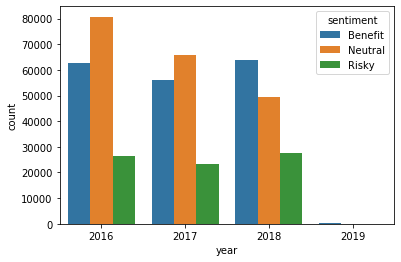

In [34]:
sns.barplot(x="year", y="count",hue="sentiment", data=df_ct);

### For monthly trend

In [35]:
df.head()

,TEXT,sentiment,Date
1,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31
3,"Happy birthday to the Audi chasing maniac, hop...",Benefit,2018-07-31
4,Come see Mercedes Benz stadium in Atlanta...,Neutral,2018-07-31
5,Italy took Cristiano and ever since then they’...,Neutral,2018-07-31


In [36]:
df.dtypes

TEXT                 object
sentiment            object
Date         datetime64[ns]
dtype: object

In [37]:
# making new dataframe
df_month=df[['sentiment','Date']]

In [38]:
df_month['month']=df['Date'].dt.month.sort_values()

In [39]:
df_month.head(2)

,sentiment,Date,month
1,Benefit,2018-07-31,7
2,Neutral,2018-07-31,7


In [40]:
df_month.dtypes

sentiment            object
Date         datetime64[ns]
month                 int64
dtype: object

In [41]:
df_month.month.unique()

array([ 7, 12, 10, 11,  2,  4,  1,  5,  9,  3,  8,  6])

**As we can see that there should be more month from 2016 to 2019. We have not got all month count correct**

# 4)- Fixing month problem

In [42]:
df_month['month_time']=df_month['Date'].dt.to_period('M')

In [43]:
df_month.head()

,sentiment,Date,month,month_time
1,Benefit,2018-07-31,7,2018-07
2,Neutral,2018-07-31,7,2018-07
3,Benefit,2018-07-31,7,2018-07
4,Neutral,2018-07-31,7,2018-07
5,Neutral,2018-07-31,7,2018-07


In [44]:
df_month.dtypes

sentiment             object
Date          datetime64[ns]
month                  int64
month_time         period[M]
dtype: object

In [45]:
df_month['month'].unique()

array([ 7, 12, 10, 11,  2,  4,  1,  5,  9,  3,  8,  6])

In [46]:
df_month['month_time'].unique()

<PeriodArray>
['2018-07', '2018-12', '2018-10', '2016-11', '2016-02', '2016-04', '2017-07',
 '2016-12', '2017-01', '2017-05', '2017-11', '2016-09', '2017-09', '2016-05',
 '2017-03', '2017-02', '2016-03', '2016-07', '2018-04', '2017-12', '2018-09',
 '2017-08', '2018-08', '2016-06', '2018-03', '2016-08', '2018-02', '2018-05',
 '2017-04', '2017-06', '2018-06', '2016-01', '2016-10', '2018-01', '2017-10',
 '2019-01', '2018-11']
Length: 37, dtype: period[M]

In [47]:
df_month=df_month[['sentiment','month_time']]

In [48]:
df_month.head()

,sentiment,month_time
1,Benefit,2018-07
2,Neutral,2018-07
3,Benefit,2018-07
4,Neutral,2018-07
5,Neutral,2018-07


In [49]:
data_month=df_month['month_time']

In [50]:
df_count = (df_month.reset_index()
          .groupby(['month_time','sentiment'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )

In [51]:
df_count

,month_time,sentiment,ct
0,2016-01,Benefit,5021
1,2016-01,Neutral,7057
2,2016-01,Risky,2280
3,2016-02,Benefit,4773
4,2016-02,Neutral,6173
...,...,...,...
106,2018-12,Neutral,3958
107,2018-12,Risky,2510
108,2019-01,Benefit,135
109,2019-01,Neutral,89


We have created plot yet we need clear plots.

### 5- Add RR and BR 

Do it manually

- RR= (RT)/(RT+BT)
- BR= (BT)/(RT+BT)

### 5.1)- For year

We have df_ct for year

In [52]:
df_ct

,year,sentiment,count
0,2016,Benefit,62723
1,2016,Neutral,80724
2,2016,Risky,26509
3,2017,Benefit,55895
4,2017,Neutral,65635
5,2017,Risky,23140
6,2018,Benefit,63776
7,2018,Neutral,49272
8,2018,Risky,27752
9,2019,Benefit,135


**Only for Risky and benefit related sentiments**

In [53]:
df_ct=df_ct[df_ct.sentiment!= "Neutral"]

In [54]:
df_ct

,year,sentiment,count
0,2016,Benefit,62723
2,2016,Risky,26509
3,2017,Benefit,55895
5,2017,Risky,23140
6,2018,Benefit,63776
8,2018,Risky,27752
9,2019,Benefit,135
11,2019,Risky,77


In [55]:
df.sentiment.value_counts()

Neutral    195720
Benefit    182529
Risky       77478
Name: sentiment, dtype: int64

- RR= (RT)/(RT+BT)
- BR= (BT)/(RT+BT)

In [56]:
# manually calculated values per year
BR=[0.7029 , 0.7072 , 0.6967 , 0.6367]
RR=[0.2970 , 0.2927 , 0.3032 , 0.3632]

In [ ]:
#add_BR=[0.7981,0, 0.7970, 0.8188 , 1]
#add_RR=[0.2018 , 0.2029 , 0.1811 , 0]

In [59]:
add_values=[0.7029 , 0.2970 , 0.7072 , 0.2927 , 0.6967 , 0.3032 , 0.6367 , 0.3632]

In [60]:
df_ct['ratio']= add_values

In [61]:
df_ct

,year,sentiment,count,ratio
0,2016,Benefit,62723,0.7029
2,2016,Risky,26509,0.2970
3,2017,Benefit,55895,0.7072
5,2017,Risky,23140,0.2927
6,2018,Benefit,63776,0.6967
8,2018,Risky,27752,0.3032
9,2019,Benefit,135,0.6367
11,2019,Risky,77,0.3632


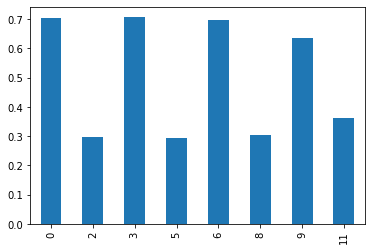

In [62]:
df_ct.ratio.plot(kind='bar')

### A neat plot

For BR and RR w.r.t year

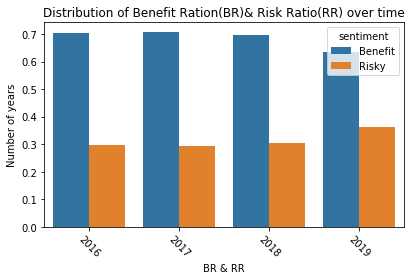

In [63]:
ax = sns.barplot(x="year", y="ratio", hue="sentiment", data=df_ct)
# Rotate x-labels
plt.xticks(rotation=-45)
# for text labeling on axis
plt.xlabel("BR & RR")
plt.ylabel("Number of years")
plt.title("Distribution of Benefit Ration(BR)& Risk Ratio(RR) over time")
plt.tight_layout()
plt.show()

# 6)- Plotting sentiments against month

- Plot risk against month-year
- plot benefit against month-year

In [64]:
df_count

,month_time,sentiment,ct
0,2016-01,Benefit,5021
1,2016-01,Neutral,7057
2,2016-01,Risky,2280
3,2016-02,Benefit,4773
4,2016-02,Neutral,6173
...,...,...,...
106,2018-12,Neutral,3958
107,2018-12,Risky,2510
108,2019-01,Benefit,135
109,2019-01,Neutral,89


In [65]:
df_count.shape

(111, 3)

In [66]:
df_count.head()

,month_time,sentiment,ct
0,2016-01,Benefit,5021
1,2016-01,Neutral,7057
2,2016-01,Risky,2280
3,2016-02,Benefit,4773
4,2016-02,Neutral,6173


In [67]:
q=df_count

In [69]:
q=q[q.sentiment!= "Neutral"]

In [70]:
q.shape

(74, 3)

### 6a)- For Risk Related Sentiments

In [71]:
r=q

In [72]:
r=r[r.sentiment=='Risky']

In [73]:
r.shape

(37, 3)

In [74]:
r.head()

,month_time,sentiment,ct
2,2016-01,Risky,2280
5,2016-02,Risky,1955
8,2016-03,Risky,2408
11,2016-04,Risky,2291
14,2016-05,Risky,2021


In [75]:
r.month_time.unique()

<PeriodArray>
['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07',
 '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
 '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
 '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
 '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
 '2018-12', '2019-01']
Length: 37, dtype: period[M]

In [76]:
type(r)

pandas.core.frame.DataFrame

In [77]:
r.sentiment.value_counts()

Risky    37
Name: sentiment, dtype: int64

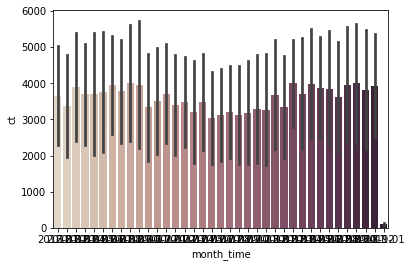

In [78]:
sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=q)

### Change figure size

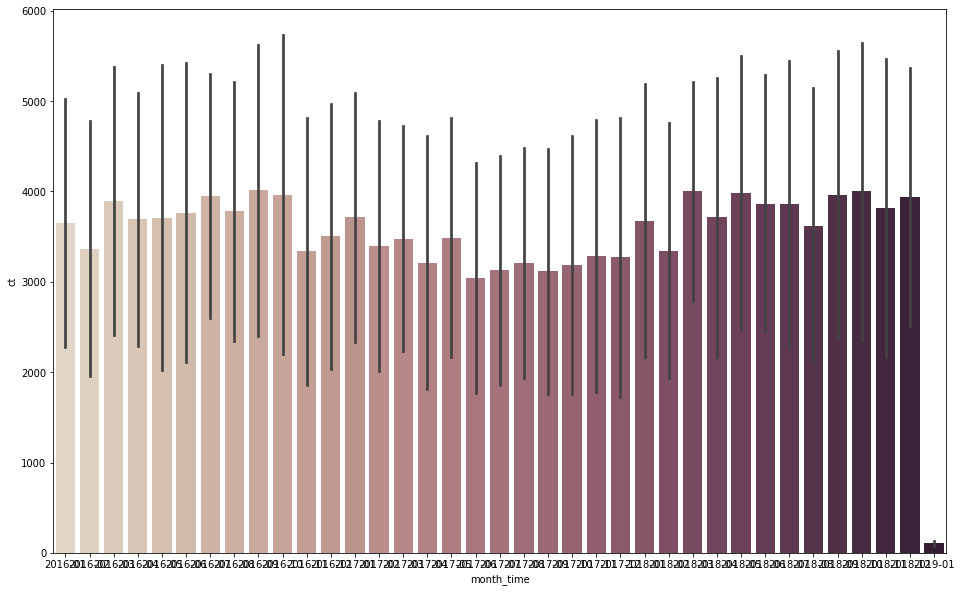

In [79]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.figure(figsize=(16,10)) # this creates a figure 16 inch wide, 10 inch high
sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=q)
plt.show()

### Rotate the ticklabels

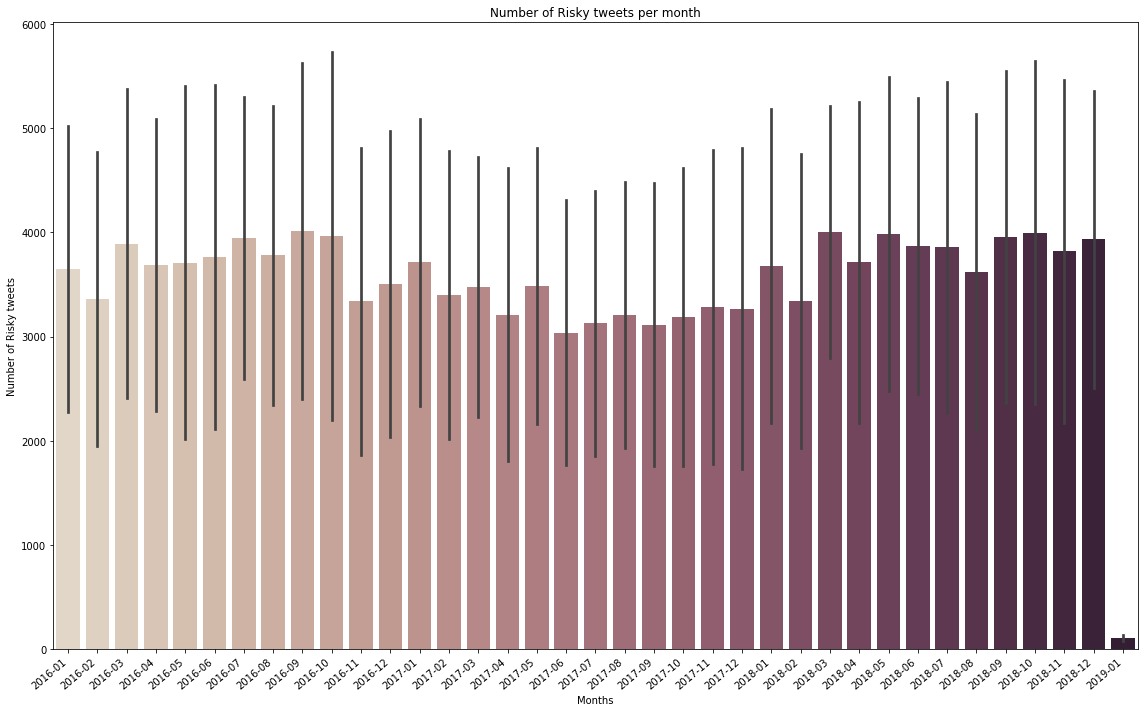

In [80]:
ax = sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=q)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.xlabel("Months")
plt.ylabel("Number of Risky tweets")
plt.title("Number of Risky tweets per month")
plt.tight_layout()
plt.show()

### 6b.for beneficial sentiments

In [81]:
b=df_count

In [82]:
b=b[b.sentiment=='Benefit']

In [83]:
b.shape

(37, 3)

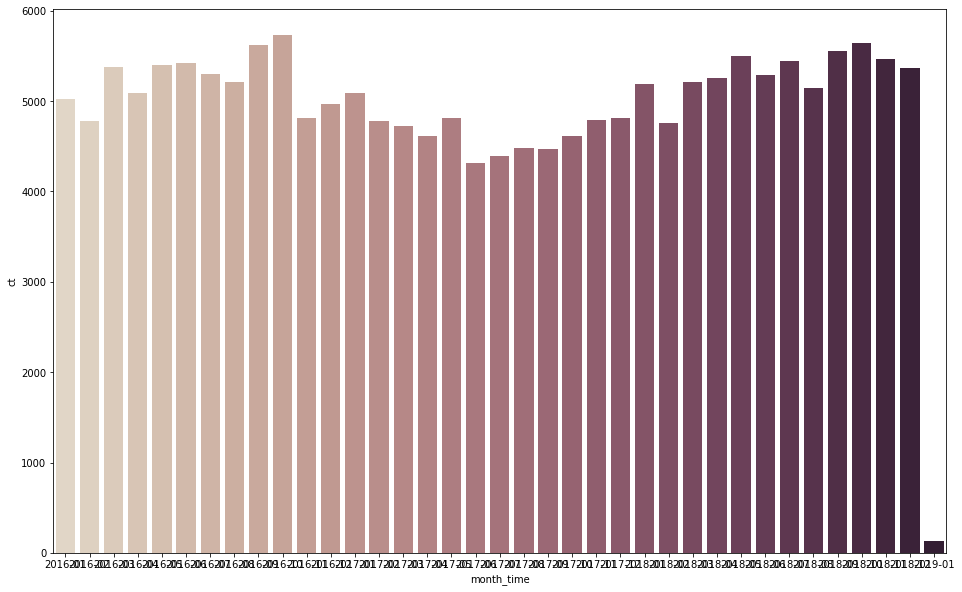

In [84]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.figure(figsize=(16,10)) # this creates a figure 16 inch wide, 10 inch high
sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=b)
plt.show()

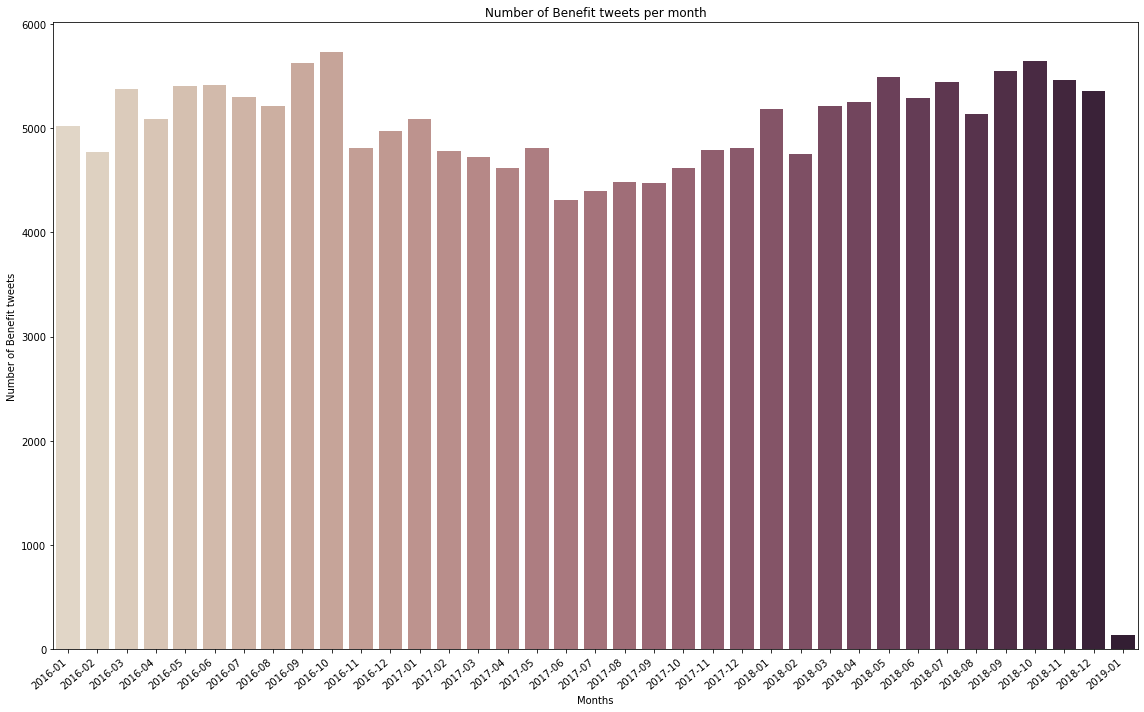

In [85]:
ax = sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=b)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Months")
plt.ylabel("Number of Benefit tweets")
plt.title("Number of Benefit tweets per month")
plt.tight_layout()
plt.show()

**We shall work from here**


- Problem of sorting
- make word cloud with risk vs benefit

# 7)- Getting company names
from company_label notebook

In [86]:
df.head(2)

,TEXT,sentiment,Date
1,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31


In [87]:
df.shape

(455727, 3)

In [88]:
company = pd.read_pickle('company_label.pkl')

In [89]:
company.head(2)

,TEXT,UTC DATE,month,year,Google,google,tesla,gm,apple,ford,...,porsche,opel,waymo,aptiv,intel,baidu,toyota,renault,mitsubishi,nissan
1,"Lookin’ good, @Matt_Hedges #MLSAllStar | @Au...",2018-07-31 23:04:43,7,2018,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AND THIS WAS HOW I LANDED AT THE MERCEDES BENZ...,2018-07-31 22:31:40,7,2018,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
company.shape

(455722, 24)

### 7.1)- Merging dataframes



In [91]:
company=company.drop(['TEXT','UTC DATE','month','year','Google'],axis=1)

In [92]:
company.shape

(455722, 19)

In [93]:
company['sentiment']=df['sentiment']

In [94]:
company.shape

(455722, 20)

**check missing values**

In [95]:
company.isnull().sum()

google          0
tesla           0
gm              0
apple           0
ford            0
daimler-benz    0
volkswagen      0
bmw             0
audi            0
porsche         0
opel            0
waymo           0
aptiv           0
intel           0
baidu           0
toyota          0
renault         0
mitsubishi      0
nissan          0
sentiment       0
dtype: int64

### 7.2)-Making two classes only

getting rid of Neutral

In [96]:
company.sentiment.value_counts()

Neutral    195717
Benefit    182528
Risky       77477
Name: sentiment, dtype: int64

In [97]:
company=company[company.sentiment!= "neutral"]

In [98]:
company.shape

(455722, 20)

In [99]:
company.columns

Index(['google', 'tesla', 'gm', 'apple', 'ford', 'daimler-benz', 'volkswagen',
       'bmw', 'audi', 'porsche', 'opel', 'waymo', 'aptiv', 'intel', 'baidu',
       'toyota', 'renault', 'mitsubishi', 'nissan', 'sentiment'],
      dtype='object')

In [101]:
company.head(3)

,google,tesla,gm,apple,ford,daimler-benz,volkswagen,bmw,audi,porsche,opel,waymo,aptiv,intel,baidu,toyota,renault,mitsubishi,nissan,sentiment
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Benefit
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Neutral
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Benefit


### 7.3)-Plot beneficial tweets vs companies

**filter only for benefit tweets**

In [102]:
b=company

In [103]:
b=b[b.sentiment=="Benefit"]

In [104]:
b.sentiment.value_counts()

Benefit    182528
Name: sentiment, dtype: int64

In [105]:
plot_b=b.drop('sentiment', axis=1)

In [106]:
plot_b.shape

(182528, 19)

In [107]:
# add all value

plot_var_b=plot_b.sum(axis=0)

In [108]:
plot_sort_b=plot_var_b.sort_values()

In [109]:
plot_sort_b

daimler-benz       24
mitsubishi         74
aptiv             102
baidu             252
opel              328
renault           410
nissan            684
waymo            1223
intel            1224
toyota           1296
apple            1588
google           2809
ford             7022
volkswagen       7665
tesla            8247
gm              12011
audi            19303
porsche         28273
bmw             30264
dtype: int64

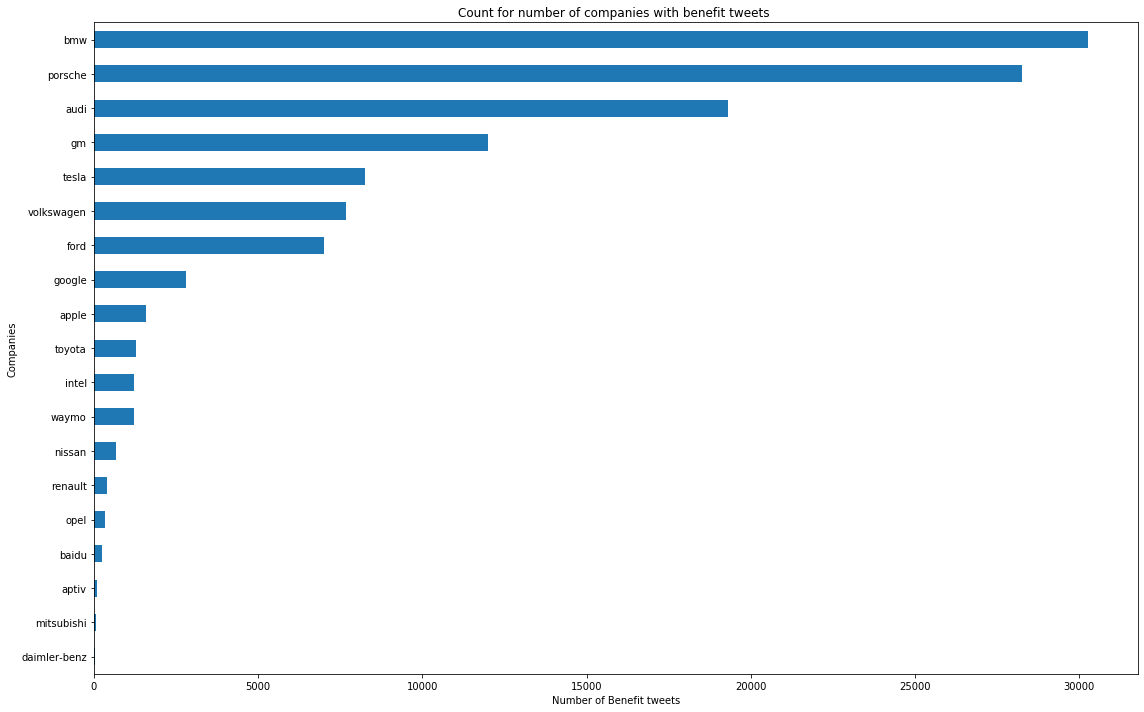

In [110]:
plot_sort_b.plot(kind='barh')
plt.xlabel("Number of Benefit tweets")
plt.ylabel("Companies")
plt.title("Count for number of companies with benefit tweets ")
plt.tight_layout()
plt.show()

### 7.4)-Plot risky tweets vs companies

In [111]:
r=company

In [112]:
r=r[r.sentiment=="Risky"]

In [113]:
r.sentiment.value_counts()

Risky    77477
Name: sentiment, dtype: int64

In [114]:
plot_r=r.drop('sentiment', axis=1)

In [115]:
plot_r.shape

(77477, 19)

In [116]:
# add all values of companies

plot_var_r=plot_r.sum(axis=0)

In [117]:
plot_sort=plot_var_r.sort_values()

In [118]:
plot_sort

daimler-benz        2
mitsubishi         41
aptiv              54
baidu             118
renault           134
opel              176
nissan            294
toyota            518
intel             661
apple             800
waymo             812
google           1743
volkswagen       3051
ford             3121
tesla            3899
gm               5764
audi             7138
porsche          9914
bmw             11120
dtype: int64

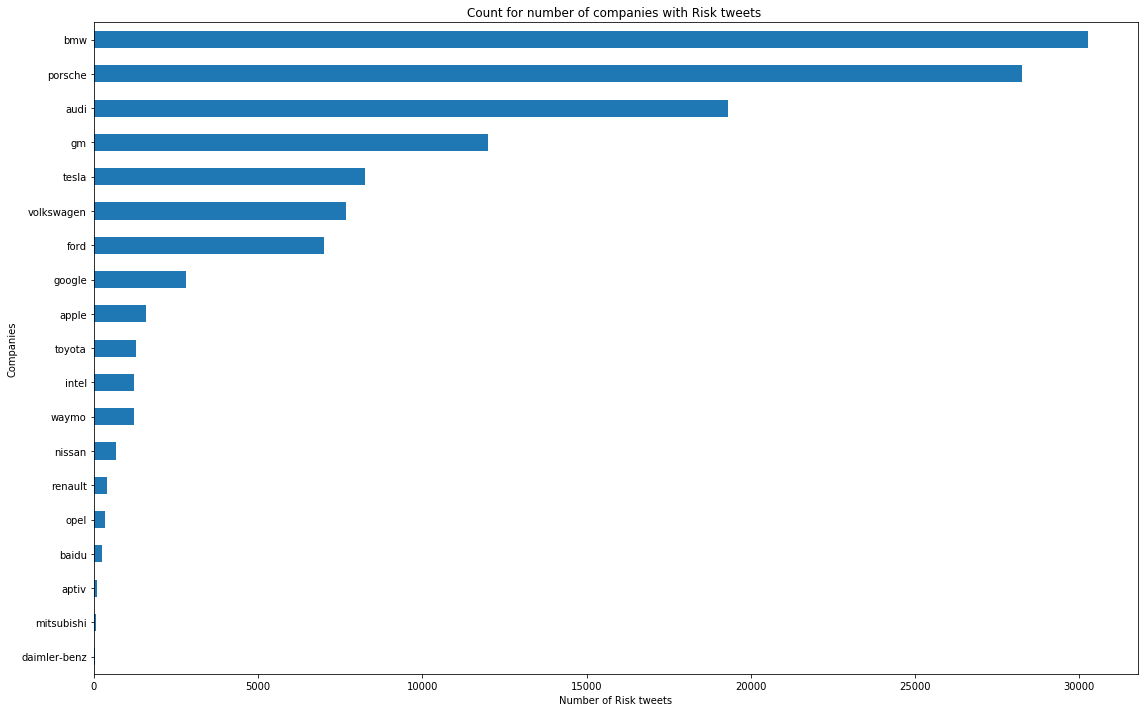

In [119]:
plot_sort_b.plot(kind='barh')
plt.xlabel("Number of Risk tweets")
plt.ylabel("Companies")
plt.title("Count for number of companies with Risk tweets ")
plt.tight_layout()
plt.show()

# 8)-Submit work

We have three main dataset for which we have processed data, cleaned, implemented model and finally did descriptive analysis.

### 1st dataset

In [120]:
company = pd.read_pickle('company_label.pkl')

In [121]:
company.shape

(455722, 24)

In [122]:
company.columns

Index(['TEXT', 'UTC DATE', 'month', 'year', 'Google', 'google', 'tesla', 'gm',
       'apple', 'ford', 'daimler-benz', 'volkswagen', 'bmw', 'audi', 'porsche',
       'opel', 'waymo', 'aptiv', 'intel', 'baidu', 'toyota', 'renault',
       'mitsubishi', 'nissan'],
      dtype='object')

In [123]:
company=company.drop(['month','year','Google'],axis=1)

In [124]:
df_submit=company

### 2nd dataset

In [125]:
df.head()

,TEXT,sentiment,Date
1,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31
3,"Happy birthday to the Audi chasing maniac, hop...",Benefit,2018-07-31
4,Come see Mercedes Benz stadium in Atlanta...,Neutral,2018-07-31
5,Italy took Cristiano and ever since then they’...,Neutral,2018-07-31


In [126]:
df.shape

(455727, 3)

In [127]:
df_submit['sentiment']= df['sentiment']

In [128]:
df_submit.columns

Index(['TEXT', 'UTC DATE', 'google', 'tesla', 'gm', 'apple', 'ford',
       'daimler-benz', 'volkswagen', 'bmw', 'audi', 'porsche', 'opel', 'waymo',
       'aptiv', 'intel', 'baidu', 'toyota', 'renault', 'mitsubishi', 'nissan',
       'sentiment'],
      dtype='object')

In [129]:
df_submit.shape

(455722, 22)

In [130]:
filename='tweets.csv'
df_org = pd.read_csv(filename, delimiter='\t', header=None,names=['TWEET ID','TIMESTAMP','UTC DATE','USER ID','SCREEN NAME','NAME','Q','TEXT'])

In [131]:
df_org.shape

(455728, 8)

In [132]:
df_org.columns

Index(['TWEET ID', 'TIMESTAMP', 'UTC DATE', 'USER ID', 'SCREEN NAME', 'NAME',
       'Q', 'TEXT'],
      dtype='object')

In [133]:
df_submit[['TWEET ID','TIMESTAMP','USER ID','SCREEN NAME']]=df_org[['TWEET ID','TIMESTAMP','USER ID','SCREEN NAME']]

In [134]:
df_submit.shape

(455722, 26)

In [135]:
df_submit.columns

Index(['TEXT', 'UTC DATE', 'google', 'tesla', 'gm', 'apple', 'ford',
       'daimler-benz', 'volkswagen', 'bmw', 'audi', 'porsche', 'opel', 'waymo',
       'aptiv', 'intel', 'baidu', 'toyota', 'renault', 'mitsubishi', 'nissan',
       'sentiment', 'TWEET ID', 'TIMESTAMP', 'USER ID', 'SCREEN NAME'],
      dtype='object')

In [136]:
df_submit.head()

,TEXT,UTC DATE,google,tesla,gm,apple,ford,daimler-benz,volkswagen,bmw,...,baidu,toyota,renault,mitsubishi,nissan,sentiment,TWEET ID,TIMESTAMP,USER ID,SCREEN NAME
1,"Lookin’ good, @Matt_Hedges #MLSAllStar | @Au...",2018-07-31 23:04:43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Benefit,1024432968759214081,1533078827,449700739,JamesCageWhite
2,AND THIS WAS HOW I LANDED AT THE MERCEDES BENZ...,2018-07-31 22:31:40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Neutral,1024437049666031616,1533079800,16665516,therealautoblog
3,a Porsche just drove past my house and I jokin...,2018-07-31 23:20:03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Benefit,1024427674301865985,1533077565,505065987,Outridge__84
4,"Oshey version of ""theChefchi"". Porsche and as...",2018-07-31 22:51:42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Neutral,1024430109552508929,1533078145,14785774,madkins1868
5,i remember me and my boys used to come to scho...,2018-07-31 21:57:51,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Neutral,1024427799724130305,1533077595,2406773050,Asensiazo


In [137]:
df_submit.isnull().sum()

TEXT            0
UTC DATE        0
google          0
tesla           0
gm              0
apple           0
ford            0
daimler-benz    0
volkswagen      0
bmw             0
audi            0
porsche         0
opel            0
waymo           0
aptiv           0
intel           0
baidu           0
toyota          0
renault         0
mitsubishi      0
nissan          0
sentiment       0
TWEET ID        0
TIMESTAMP       0
USER ID         0
SCREEN NAME     0
dtype: int64

In [138]:
df_submit.to_csv('submit.csv',index=False)
#df_submit.to_excel('submit.xlsx',index=False)

# END of Notebook